# Neural Networks - Image Recognition 

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np

In [7]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [8]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


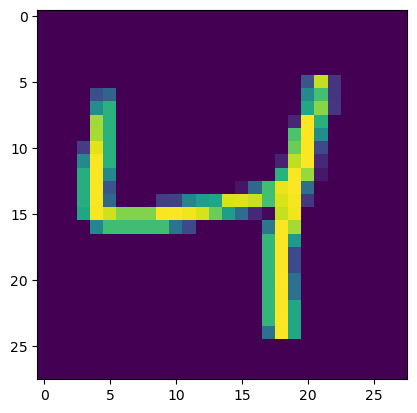

In [9]:
plt.imshow(x_train[2])

In [10]:
import numpy as np
np.max(x_train[2])

255

In [11]:
y_train[2]

4

In [12]:
28*28

784

In [13]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [17]:
batch_size = 128
num_classes = 10
epochs = 20

In [18]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
keras.utils.np_utils.to_categorical(y_train, num_classes)[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [23]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2023-04-22 16:57:45.815026: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


2023-04-22 16:57:46.889898: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2436 - accuracy: 0.9252 - val_loss: 0.1193 - val_accuracy: 0.9632
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1040 - accuracy: 0.9680 - val_loss: 0.0907 - val_accuracy: 0.9713
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0738 - accuracy: 0.9778 - val_loss: 0.0852 - val_accuracy: 0.9756
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0705 - val_accuracy: 0.9812
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0511 - accuracy: 0.9848 - val_loss: 0.0783 - val_accuracy: 0.9798
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0750 - val_accuracy: 0.9825
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0927 - val_accuracy: 0.9795
Epoch 

In [24]:
history

In [25]:
score

[0.1290832757949829, 0.9829999804496765]

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [27]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:
import tensorflow as tf 

In [31]:
batch_size = 128
num_classes = 10
epochs = 12


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 44s 93ms/step - loss: 2.2896 - accuracy: 0.1326 - val_loss: 2.2649 - val_accuracy: 0.2781
Epoch 2/12
469/469 [==============================] - 49s 104ms/step - loss: 2.2494 - accuracy: 0.2264 - val_loss: 2.2168 - val_accuracy: 0.4445
Epoch 3/12
469/469 [==============================] - 50s 107ms/step - loss: 2.1990 - accuracy: 0.3223 - val_loss: 2.1518 - val_accuracy: 0.5464
Epoch 4/12
469/469 [==============================] - 49s 104ms/step - loss: 2.1291 - accuracy: 0.4000 - val_loss: 2.0597 - val_accuracy: 0.6258
Epoch 5/12
469/469 [==============================] - 51s 108ms/step - loss: 2.0315 - accuracy: 0.4620 - val_loss: 1.9330 - val_accuracy: 0.6648
Epoch 6/12
469/469 [==============================] - 52s 112ms/step - loss: 1.9034 - accuracy: 0.5097 - val_loss: 1.7699 - val_accuracy: 0.6956
Epoch 7/12
469/469 [==============================] - 55s 117ms/step - loss: 1.7495 - accuracy: 0.5493 - val_loss: 1.5776 - val_acc

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8248116374015808
Test accuracy: 0.8188999891281128


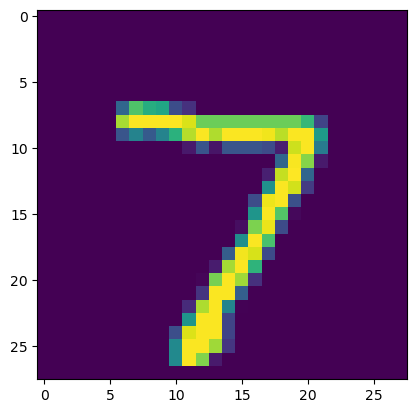

In [33]:
plt.imshow(x_test[0].reshape(28,28))

In [34]:
model.predict(x_test[0:1]), y_test[:1]

(array([[0.00712639, 0.01037888, 0.00615095, 0.06925707, 0.01661511,
         0.02114039, 0.00331039, 0.79419684, 0.02726349, 0.0445606 ]],
       dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [37]:
model.predict(x_test[0:1] > 0.5).astype("int32"), y_test[:1]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [35]:
model.predict_classes(x_test[0:1]), y_test[:1]

AttributeError: 'Sequential' object has no attribute 'predict_classes'